# MOHAMMAD ZACHARY ABIDIN

## Machine Learning CLUSTERING

Tujuan dari pembuatan model machine learning ini adalah untuk dapat membuat cluster customer-customer yang mirip
* Data cleansing terlebih dahulu, merubah tipe data
supaya sesuai
* Data merge untuk menggabungkan semua data
* Membuat data baru untuk clustering, yaitu groupby by
* customerID lalu yang di aggregasi adalah :
  1.   Transaction id count
  2.   Qty sum
  3.   Total amount sum

* Menggunakan metode clustering KMeans

# Apa itu clustering?

* Clustering merupakan sebuah teknik yang digunakan untuk menemukan sub-kelompok atau kluster. Prinsip dari clustering adalah data-data yang termasuk dalam kluster yang sama “diharapkan” memiliki kesamaan satu dengan yang lainnya, sedangkan data-data yang ada dalam kluster yang berbeda cukup berbeda dari satu kluster dengan cluster yang lainnya.

* Meskipun tanpa label, clustering memanfaatkan “karakter/pola” pada data bahwa data yang “mirip” akan berdekatan, seperti pada gambar di samping.


## Libraries yang digunakan

Cell berikut berisi semua _library_ yang akan digunakan

In [ ]:
from pprint import pprint
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from yellowbrick.cluster import SilhouetteVisualizer

## 1 Upload Dataset and Exploration

## 1.1 Uplaod Dataset
Mount Drive pada folder Google Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Uplaod data yang sudah di gabungkan khusus untuk Clustering


In [ ]:
# df_gab adalah variabel data gabungan
df_gab = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rakamin_Kalbe/dataset/Data_ML_Clustering.csv")

In [ ]:
print("Jumlah data gabungan:", df_gab.shape[0])

Jumlah data gabungan: 447


> **Insights:**

Dari angka di atas, terdapat total kurang lebih 450 customer dengan total banyak transaksi dan total jumlah pembelian di setiap customer.

### 1.2 Exploration

In [ ]:
with pd.option_context("display.max_columns", None):
    display(df_gab.head())

,customerid,tot_transaksi,tot_qty,tot_amount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [ ]:
df_gab.head()

,customerid,tot_transaksi,tot_qty,tot_amount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [ ]:
# Pilih indeks pertama pada df_gab
df_gab.loc[0]

customerid            1
tot_transaksi        17
tot_qty              60
tot_amount       623300
Name: 0, dtype: int64

In [ ]:
df_gab.head()

,customerid,tot_transaksi,tot_qty,tot_amount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [ ]:
df_gab.tail()

,customerid,tot_transaksi,tot_qty,tot_amount
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300
446,447,13,42,439300


In [ ]:
# Cek missing vallue
df_gab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   customerid     447 non-null    int64
 1   tot_transaksi  447 non-null    int64
 2   tot_qty        447 non-null    int64
 3   tot_amount     447 non-null    int64
dtypes: int64(4)
memory usage: 14.1 KB


In [ ]:
df_gab.isna().sum()

customerid       0
tot_transaksi    0
tot_qty          0
tot_amount       0
dtype: int64

> **Insights Data Gabungan:**

* Pada data gabungan, sudah dipastikan data tidak ada missing vallues/null vallues
* Terdapat kurang lebih 450 total customer yang unik
* Setiap customer memiliki total keseluruhan transaksi
* Setiap customer juga memiliki jumlah kuantitas dan total ammount yang dikeluarkan dari total transaksi
* Terdapat 5 fitur yang mempresentasikan data gabungan yaitu, customerid, total transaksi, total kuantitas, dan total pengeluaran

## **2 Exploratory Data Analysis**

> Jika diperhatikan ,fitur yang berisi kode atau identifier customer dianggap sebagai integer, sedangkan secara konteks adalah bukan integer. Oleh karena itu, perlu mengubah fitur `customerid` tersebut menjadi tipe data `object`.

In [ ]:
df_gab.dtypes

customerid       int64
tot_transaksi    int64
tot_qty          int64
tot_amount       int64
dtype: object

* Fitur `customerid` bertipe data integer. Fitur tersebut seharusnya bertipe data kategorik karena tidak mencerminkan deret angka. Oleh karena itu, harus diubah tipe data fitur tersebut menjadi object.

In [ ]:
# Instruksi looping untuk mengubah tipe data pada kolom yang berakhiran dengan 'id' menggunakan function astype()
for feature in df_gab.columns:
    if (
        feature.endswith("id")
    ):
        df_gab[feature] = df_gab[feature].astype("object")

In [ ]:
df_gab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     447 non-null    object
 1   tot_transaksi  447 non-null    int64 
 2   tot_qty        447 non-null    int64 
 3   tot_amount     447 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.1+ KB


* Customerid berhasil diubah menjadi object

In [ ]:
for feature in df_gab.columns:
    print(
        f"- num of unique values in `{feature}`:",
        df_gab[feature].nunique()
    )

- num of unique values in `customerid`: 447
- num of unique values in `tot_transaksi`: 19
- num of unique values in `tot_qty`: 59
- num of unique values in `tot_amount`: 420


Kita akan coba lihat apakah ada pola khusus untuk  _missing values_ pada masing-masing fitur

In [ ]:
df_gab[df_gab.isna().all(axis=1)]

,customerid,tot_transaksi,tot_qty,tot_amount


In [ ]:
for feature in df_gab.columns:
    # hanya pilih fitur yang memiliki missing values dan tampilkan nilai missing values dan hitung jumlahnya dengan unique()
    if df_gab[feature].isna().any():
        print(f"num of unique values in {feature}: ",
            df_gab[feature].unique())

In [ ]:
df_gab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     447 non-null    object
 1   tot_transaksi  447 non-null    int64 
 2   tot_qty        447 non-null    int64 
 3   tot_amount     447 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.1+ KB


In [ ]:
df_gab.isna().sum()

customerid       0
tot_transaksi    0
tot_qty          0
tot_amount       0
dtype: int64

In [ ]:

df_gab.head()

,customerid,tot_transaksi,tot_qty,tot_amount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [ ]:
num_customers = df_gab.customerid.nunique()

print("Number of unique customers:", num_customers)

Number of unique customers: 447


> **Insights:**

Terdapat 447 customer yang unik.

In [ ]:
# Summary statistics dari customer transaction
df_gab.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
tot_transaksi,447.0,11.230,3.245,3.0,9.0,11.0,14.0,21.0
tot_qty,447.0,40.931,12.757,10.0,32.0,40.0,50.0,79.0
tot_amount,447.0,362512.304,124634.279,92100.0,271750.0,354200.0,441200.0,846700.0


<ipython-input-31-fa6fcf0b2197>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_gab.corr(), annot=True)


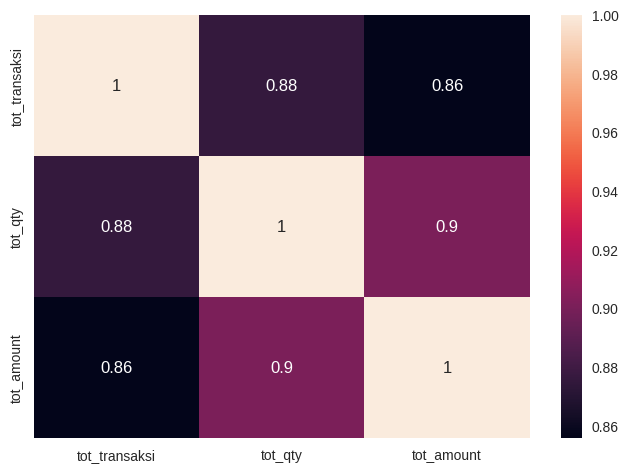

In [ ]:
# Visualisasikan hubungan antara variabel numerik pada df_gab
sns.heatmap(df_gab.corr(), annot=True)
plt.show()

# Clustering Development

## 3 Model Development


In [ ]:
X = df_gab
X.head()

,customerid,tot_transaksi,tot_qty,tot_amount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     447 non-null    object
 1   tot_transaksi  447 non-null    int64 
 2   tot_qty        447 non-null    int64 
 3   tot_amount     447 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.1+ KB


### 3.1 Data Preparation



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Menggunakan LabelEncoder untuk mengubah customerid menjadi nilai numerik
label_encoder = LabelEncoder()
df_gab['customerid_numeric'] = label_encoder.fit_transform(df_gab['customerid'])

> Selanjutnya melakukan standarisasi pada kolom tot_transaksi, tot_qty dan tot_amount

In [ ]:
# Mengambil kolom numerik yang akan di-standarisasi
columns_to_standardize = ['tot_transaksi', 'tot_qty', 'tot_amount']

# Standarisasi kolom numerik
scaler = StandardScaler()
df_gab[columns_to_standardize] = scaler.fit_transform(df_gab[columns_to_standardize])

# Tampilkan hasil setelah standarisasi
print(df_gab)

    customerid  tot_transaksi   tot_qty  tot_amount  customerid_numeric
0            1       1.779816  1.496527    2.094768                   0
1            2       0.545884  1.261093    0.239269                   1
2            3       1.162850  1.182615    0.672218                   2
3            4      -0.379565  0.397833   -0.482047                   3
4            5      -1.305014 -1.093251   -0.754347                   4
..         ...            ...       ...         ...                 ...
442        443       1.471333  1.418049    0.984681                 442
443        444       2.088298  1.653484    1.728488                 443
444        445       2.088298  2.124352    1.804796                 444
445        446      -0.071082  0.083921    0.488275                 445
446        447       0.545884  0.083921    0.616794                 446

[447 rows x 5 columns]


### 3.2 K-Means

* Dalam tahap awal saya akan menentukan initial `k`, dimana saya akan mencoba menentukannya menggunakan Elbow Method

* *Notes*. Durasi pelatihan model akan berbanding lurus dengan banyaknya data dan jumlah cluster (`k`) yang ditentukan

> Metode Elbow (Siku):
Metode ini melibatkan plot nilai inersia (inertia) terhadap nilai K. Inersia adalah jumlah jarak kuadrat antara setiap anggota klaster dengan pusat klasternya. Jumlah inersia cenderung menurun ketika nilai K meningkat karena setiap klaster akan memiliki lebih sedikit anggota. Namun, pada titik tertentu, penurunan inersia akan melambat, dan grafik inersia terlihat seperti siku. Nilai K yang tepat dapat dianggap sebagai titik di mana penurunan inersia tidak sebesar sebelumnya (siku dalam grafik). Nilai K yang sesuai adalah saat inersia mulai menurun dengan lambat setelah titik siku.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

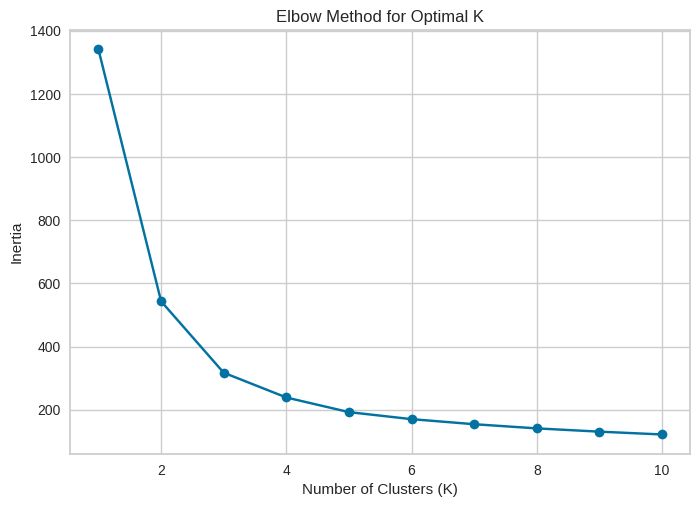

In [ ]:
# Implementasi metode Elbow Method
inertia_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_gab[columns_to_standardize])
    inertia_values.append(kmeans.inertia_)

# Plot nilai inersia untuk setiap nilai K
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

* Kemugkinan cluster yang tepat adalah 4 berdasarkan hasil penurunan insersia pada hasil grafik elbow method diatas

> Agar lebih yakin lebih baiknya ditambahkan Silhouette Score untuk menentukan nilai K

### 3.3 Silhouette Score

> Silhouette Score adalah metrik evaluasi yang digunakan untuk mengukur seberapa baik setiap titik data cocok dalam klaster yang telah ditugaskan kepadanya dalam metode klasterisasi, seperti K-Means. Metrik ini memberikan informasi tentang seberapa padat dan terpisahnya klaster yang telah dibentuk.

> Silhouette Score berkisar antara -1 hingga 1. Untuk memilih nilai K yang optimal dalam klasterisasi menggunakan K-Means, dapat mencari nilai K yang memberikan Silhouette Score tertinggi. Nilai K yang memberikan skor Silhouette Score tertinggi seharusnya menunjukkan klasterisasi yang lebih baik dan lebih sesuai dengan data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

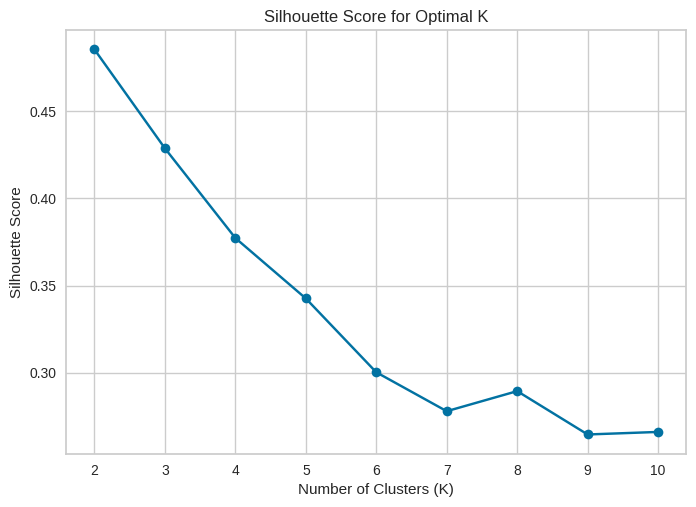

In [ ]:
# Implementasi metode Silhouette Score
silhouette_scores = []
k_values = range(2, 11)  # Ubah range K sesuai kebutuhan

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_gab[columns_to_standardize])
    silhouette_scores.append(silhouette_score(df_gab[columns_to_standardize], kmeans.labels_))

# Plot nilai Silhouette Score untuk setiap nilai K
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

> Berdasrkan hasil silhouette score diatas, menunjukkan bahwa Elbow Method yang tepat adalah 8

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

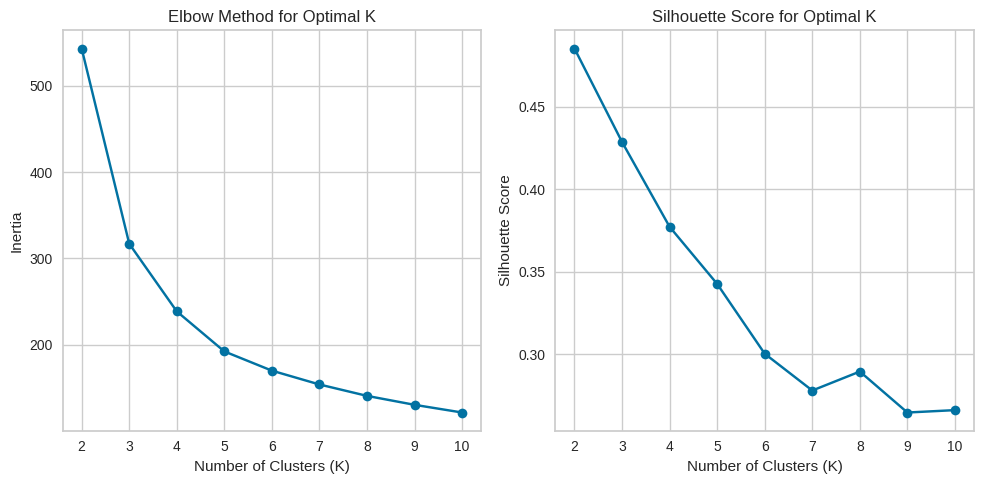

In [ ]:
from sklearn.metrics import silhouette_score

# Implementasi metode elbow dan Silhouette Score
inertia_values = []
silhouette_scores = []
k_values = range(2, 11)  # Ubah range K sesuai kebutuhan

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_gab[columns_to_standardize])
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_gab[columns_to_standardize], kmeans.labels_))

# Plot nilai inersia dan Silhouette Score untuk setiap nilai K
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')

plt.tight_layout()
plt.show()


### 3.3 Visualize Clusters

> Berdasarkan hasil Elbow Method kemungkinan cluster optimal nya adalah 4 menurut saya pribadi

> Namun bila menggunakan Silhouette Score, K yang optimal adalah 8

> Maka sudah dapat divisualisasikan jika sudah menemukan nilai K yang optimal yaitu 4 atau 8

> Notes: Disini saya juga akan mencoba memvisualisasi hasil cluster ketika K=4 dan K=8

#### 3.3.1 Clustering K=8

In [ ]:
# Klasterisasi dengan K-Means dan K=8
kmeans = KMeans(n_clusters=8, random_state=0)
df_gab['cluster'] = kmeans.fit_predict(df_gab[columns_to_standardize])

# Disimpan di variabel df_gab8 untuk memudahkan analisa
daf_gab8 = df_gab['cluster']

# Tampilkan hasil klasterisasi
print(df_gab)

    customerid  tot_transaksi   tot_qty  tot_amount  customerid_numeric  \
0            1       1.779816  1.496527    2.094768                   0   
1            2       0.545884  1.261093    0.239269                   1   
2            3       1.162850  1.182615    0.672218                   2   
3            4      -0.379565  0.397833   -0.482047                   3   
4            5      -1.305014 -1.093251   -0.754347                   4   
..         ...            ...       ...         ...                 ...   
442        443       1.471333  1.418049    0.984681                 442   
443        444       2.088298  1.653484    1.728488                 443   
444        445       2.088298  2.124352    1.804796                 444   
445        446      -0.071082  0.083921    0.488275                 445   
446        447       0.545884  0.083921    0.616794                 446   

     cluster  
0          4  
1          5  
2          1  
3          6  
4          0  
..       

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##### 3.3.1.1 Plot Visualisasi dalam 2D

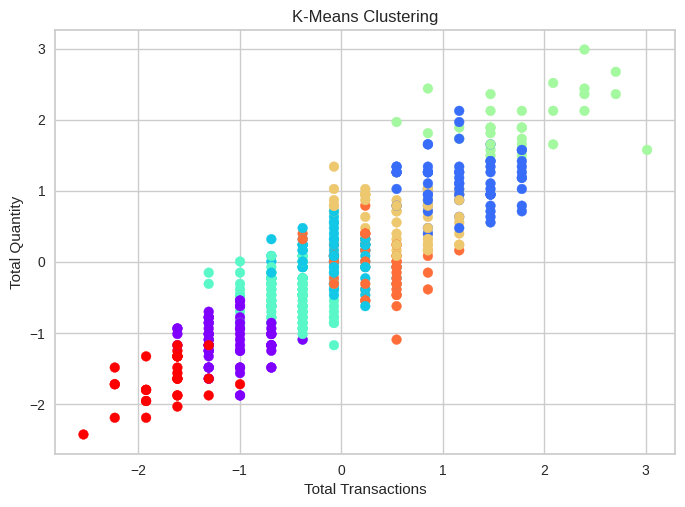

In [ ]:
# Plot scatter untuk 2D
plt.scatter(df_gab['tot_transaksi'], df_gab['tot_qty'], c=df_gab['cluster'], cmap='rainbow')
plt.xlabel('Total Transactions')
plt.ylabel('Total Quantity')
plt.title('K-Means Clustering')
plt.show()

##### 3.3.1.2 Plot Visualisasi dalan 3D

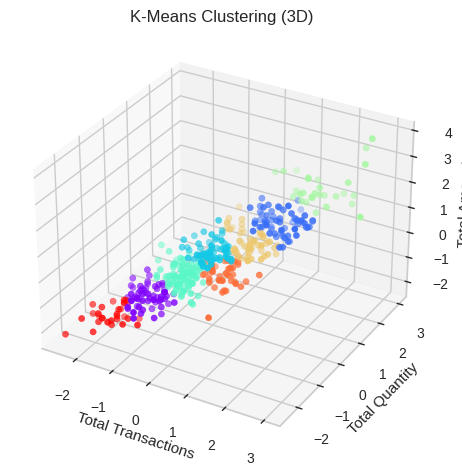

In [ ]:
# Plot 3D untuk tiga fitur
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_gab['tot_transaksi'], df_gab['tot_qty'], df_gab['tot_amount'], c=df_gab['cluster'], cmap='rainbow')
ax.set_xlabel('Total Transactions')
ax.set_ylabel('Total Quantity')
ax.set_zlabel('Total Amount')
ax.set_title('K-Means Clustering (3D)')
plt.show()

#### 3.3.2 Clustering K=4

In [ ]:
# Klasterisasi dengan K-Means dan K=4
kmeans = KMeans(n_clusters=4, random_state=0)
df_gab['cluster'] = kmeans.fit_predict(df_gab[columns_to_standardize])

# disimpan ke variabel df_gab4 untuk memudahkan analisis
df_gab4 = df_gab['cluster']
# Tampilkan hasil klasterisasi
print(df_gab4)

0      3
1      1
2      1
3      2
4      0
      ..
442    3
443    3
444    3
445    2
446    1
Name: cluster, Length: 447, dtype: int32


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##### 3.3.2.1 Plot Visualisasi dalam 2D

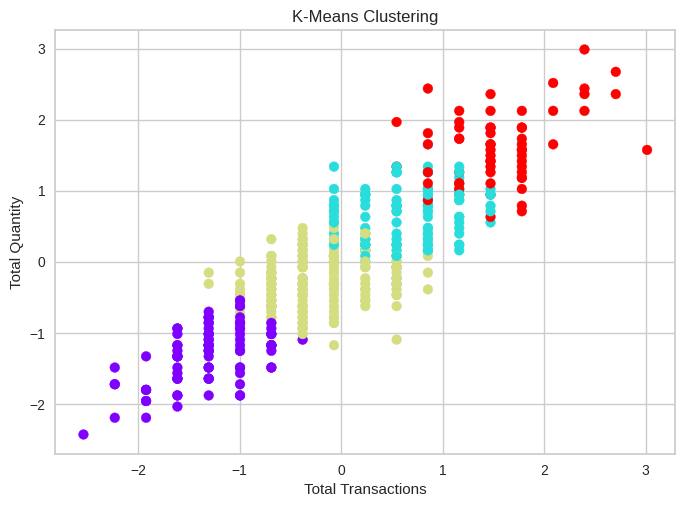

In [ ]:
# Plot scatter untuk 2D
plt.scatter(df_gab['tot_transaksi'], df_gab['tot_qty'], c=df_gab['cluster'], cmap='rainbow')
plt.xlabel('Total Transactions')
plt.ylabel('Total Quantity')
plt.title('K-Means Clustering')
plt.show()

##### 3.3.2.2 Plot Visualisasi dalam 3D

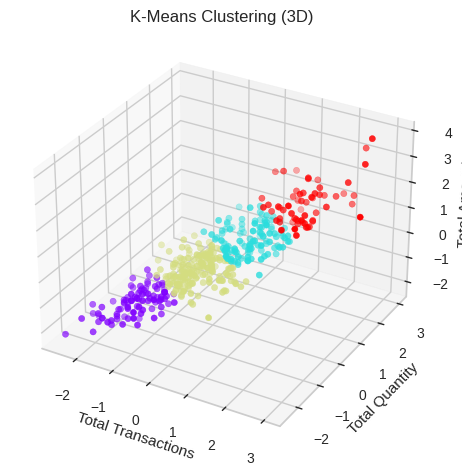

In [ ]:
# Plot 3D untuk tiga fitur
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_gab['tot_transaksi'], df_gab['tot_qty'], df_gab['tot_amount'], c=df_gab['cluster'], cmap='rainbow')
ax.set_xlabel('Total Transactions')
ax.set_ylabel('Total Quantity')
ax.set_zlabel('Total Amount')
ax.set_title('K-Means Clustering (3D)')
plt.show()

# Model Evaluation

Pada tahap evaluasi model, akan dilakukan beberapa hal diantaranya:

## 4. Analisis Profil Klaster dan Jumlah data setiap klaster

### 4.1 Analisis Profil Klaster dan Jumlah Data

In [ ]:
# Analisis Profil Klaster
cluster_profiles = df_gab.groupby('cluster')[columns_to_standardize].mean()
print("Cluster Profiles:")
print(cluster_profiles)

# Analisis Jumlah Data dalam Setiap Klaster
cluster_counts = df_gab['cluster'].value_counts().sort_index()
print("\nJumlah Data dalam Setiap Klaster:")
print(cluster_counts)

Cluster Profiles:
         tot_transaksi   tot_qty  tot_amount
cluster                                     
0            -1.298380 -1.289025   -1.238834
1             0.624357  0.639463    0.591922
2            -0.247603 -0.281003   -0.295988
3             1.569019  1.626016    1.683506

Jumlah Data dalam Setiap Klaster:
0     93
1    114
2    180
3     60
Name: cluster, dtype: int64


### 4.2 Plot VisualisasiAnalisis Klaster

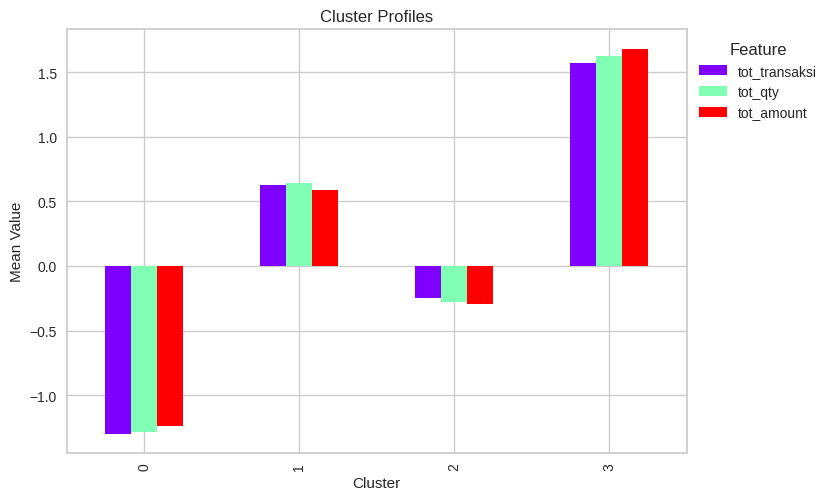

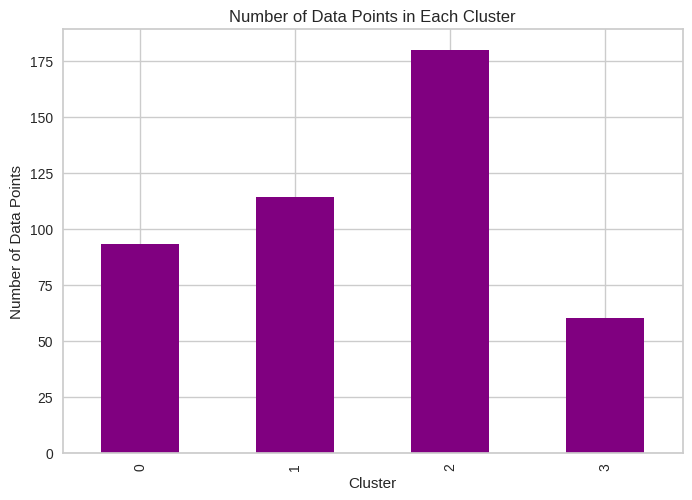

In [ ]:
# Visualisasi Profil Klaster dalam Bentuk Bar Plot
cluster_profiles.plot(kind='bar', colormap='rainbow')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.title('Cluster Profiles')
plt.legend(title='Feature', bbox_to_anchor=(1, 1))
plt.show()

# Visualisasi Jumlah Data dalam Setiap Klaster dalam Bentuk Bar Plot
cluster_counts.plot(kind='bar', color='purple')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points in Each Cluster')
plt.show()



* Cluster ke - 4 memiliki rata - rata fitur paling tinggi diantara cluster lainnya. Cluster ke - 1 memiliki rata- rata fitur paling kecil.
* Cluster ke- 3 memiliki jumlah data paling banyak dan cluster ke - 4 memiliki jumlah data paling sedikit


# Interpretasi Bisnis

## 5.1 Segmentasi pelanggan

Membagi 4 jenis kelas pelanggan berdasarkan total amount dan total transaksi ssebagai berikut:

1.   Diamond
2.   Gold
3.   Platinum
4.   Bronze



In [ ]:
# Inverse transform kolom numerik yang telah distandarisasi
df_gab[columns_to_standardize] = scaler.inverse_transform(df_gab[columns_to_standardize])

Mengembalikan nilai asli tiap cluster

In [ ]:
# Memisahkan data pelanggan premium dan reguler berdasarkan klaster
df_Diamond = df_gab[df_gab['cluster'] == 3]
df_Gold = df_gab[df_gab['cluster'] == 1]
df_Platinum = df_gab[df_gab['cluster'] == 2]
df_Bronze = df_gab[df_gab['cluster'] == 0]


In [ ]:
# Tampilkan hasil segmentasi pelanggan
print("Data Pelanggan Diamond:")
print(df_Diamond)
print("\nData Pelanggan Gold:")
print(df_Gold)
print("Data Pelanggan Platinum:")
print(df_Platinum)
print("\nData Pelanggan Bronze:")
print(df_Bronze)

Data Pelanggan Diamond:
    customerid  tot_transaksi      tot_qty    tot_amount  customerid_numeric  \
0            1      66.338818   805.474730  7.759796e+10                   0   
6            7      66.338818   767.247526  6.209836e+10                   6   
11          12      63.097148   818.217131  7.251858e+10                  11   
12          13      72.822158   907.413941  8.328738e+10                  12   
18          19      59.855478   843.701934  7.153507e+10                  18   
19          20      59.855478   716.277920  6.579586e+10                  19   
22          23      59.855478   741.762723  6.305697e+10                  22   
28          29      59.855478   843.701934  5.588607e+10                  28   
36          37      56.613808   958.383546  7.782206e+10                  36   
43          44      72.822158   945.641145  6.770063e+10                  43   
44          45      66.338818   729.020322  6.890823e+10                  44   
46          47  

In [ ]:
#disimpan dalam data frame agar lebih enak dibaca
# Tampilkan hasil segmentasi pelanggan
df_Diamond
df_Gold
df_Platinum
df_Bronze

,customerid,tot_transaksi,tot_qty,tot_amount,customerid_numeric,cluster
4,5,33.922116,384.975485,3.343966e+10,4,0
10,11,33.922116,397.717887,3.078792e+10,10,0
24,25,20.955436,168.354662,1.146633e+10,24,0
32,33,30.680446,359.490683,2.451339e+10,32,0
40,41,30.680446,346.748281,2.562139e+10,40,0
...,...,...,...,...,...,...
425,426,40.405457,372.233084,2.136367e+10,425,0
431,432,27.438776,270.293873,2.482462e+10,431,0
436,437,33.922116,397.717887,2.773780e+10,436,0
438,439,33.922116,372.233084,1.416787e+10,438,0


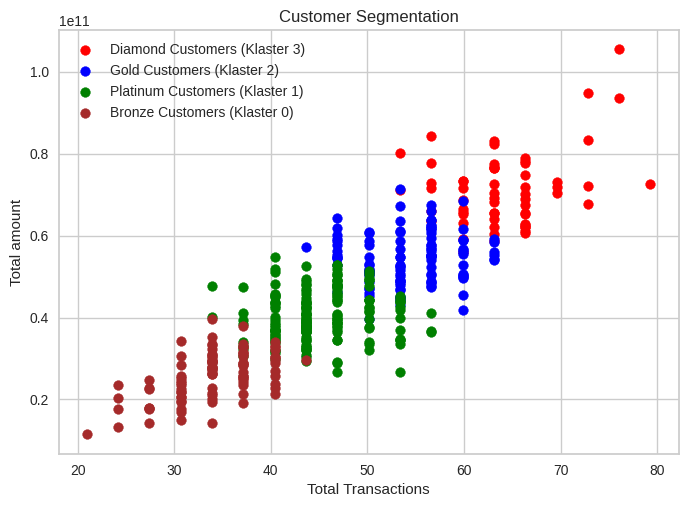

In [ ]:
# Visualisasi hasil segmentasi pelanggan
plt.scatter(df_Diamond['tot_transaksi'], df_Diamond['tot_amount'], color='red', label='Diamond Customers (Klaster 3)')
plt.scatter(df_Gold['tot_transaksi'], df_Gold['tot_amount'], color='blue', label='Gold Customers (Klaster 2)')
plt.scatter(df_Platinum['tot_transaksi'], df_Platinum['tot_amount'], color='green', label='Platinum Customers (Klaster 1)')
plt.scatter(df_Bronze['tot_transaksi'], df_Bronze['tot_amount'], color='brown', label='Bronze Customers (Klaster 0)')
plt.xlabel('Total Transactions')
plt.ylabel('Total amount')
plt.title('Customer Segmentation')
plt.legend()
plt.show()

## 5.3 Total transaksi dan amount setiap klaster

In [ ]:
# Menampilkan total keseluruhan tot_transaksi dan tot_amount setiap klaster
cluster_totals = df_gab.groupby('cluster')[['tot_transaksi', 'tot_amount']].sum()
print("Total Keseluruhan Total Transactions dan Total Quantity dalam Setiap Klaster:")
print(cluster_totals)

Total Keseluruhan Total Transactions dan Total Quantity dalam Setiap Klaster:
         tot_transaksi    tot_amount
cluster                             
0          3161.240157  2.411548e+12
1          6178.432096  6.190819e+12
2          8106.091435  7.297875e+12
3          3847.420608  4.273430e+12


## 5.3 jumlah customer tiap cluster

In [ ]:
# Menghitung jumlah pelanggan dalam setiap klaster
customer_counts = df_gab['cluster'].value_counts()

# Tampilkan jumlah pelanggan dalam setiap klaster
print("Jumlah Pelanggan dalam Setiap Klaster:")
print(customer_counts)

Jumlah Pelanggan dalam Setiap Klaster:
2    180
1    114
0     93
3     60
Name: cluster, dtype: int64


* Pelanggan Diamond (Klaster 3) berjumlah 60
* Pelanggan Gold (Klaster 2) berjumlah 180
* Pelanggan Platinum (Klaster 1) berjumlah 114
* Pelanggan Bronze (Klaster 0) berjumlah 93

# Business Recommendation

> Berdasarkan Interpretasi bisnis yang ada, ada beberapa solusi bisnis yang dapat diajukan yaitu:
* 60 pelanggan dalam klaster Diamond harus di pertahankan dengan memberikan banyak bonus dan kemudahan dalam berbelanja
* Klaster Gold diusahakan agar dapat menajdi klaster Diamond, klaster Platinum diusahakan dapat berpindah menjadi klaster gold dengan memberikan promo menarik untuk meningkatkan frekuensi belanja dan amount yang di keluarkan
* Merekomendasikan lebih banyak barang kepada klaster Bronze agar dapat memilih dan membeli barang lebih banyak